In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree


In [25]:
data = pd.read_csv(r"C:\Users\Vishal\OneDrive\Desktop\Pizza SQL\pizza_sales\pizza_orders.csv")
data.head()

,order_id,pizza_id,quantity,date,time
0,1,hawaiian_m,1,1/1/2015,11:38:36
1,2,classic_dlx_m,1,1/1/2015,11:57:40
2,2,five_cheese_l,1,1/1/2015,12:12:28
3,2,ital_supr_l,1,1/1/2015,12:16:31
4,2,mexicana_m,1,1/1/2015,12:21:30


In [26]:
data.isnull()

,order_id,pizza_id,quantity,date,time
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
2563,False,False,False,False,False
2564,False,False,False,False,False
2565,False,False,False,False,False
2566,False,False,False,False,False


In [27]:
data.isnull().sum()

order_id    0
pizza_id    0
quantity    0
date        0
time        0
dtype: int64

In [28]:
data.isnull().sum().sum()

0

In [29]:
data.dropna()

,order_id,pizza_id,quantity,date,time
0,1,hawaiian_m,1,1/1/2015,11:38:36
1,2,classic_dlx_m,1,1/1/2015,11:57:40
2,2,five_cheese_l,1,1/1/2015,12:12:28
3,2,ital_supr_l,1,1/1/2015,12:16:31
4,2,mexicana_m,1,1/1/2015,12:21:30
...,...,...,...,...,...
2563,1135,pepperoni_l,1,2/12/2015,14:53:19
2564,1136,ital_supr_l,1,2/12/2015,15:04:49
2565,1136,thai_ckn_m,1,2/12/2015,15:25:11
2566,1136,veggie_veg_s,1,2/12/2015,15:38:37


In [30]:
data.dropna(axis=1)

,order_id,pizza_id,quantity,date,time
0,1,hawaiian_m,1,1/1/2015,11:38:36
1,2,classic_dlx_m,1,1/1/2015,11:57:40
2,2,five_cheese_l,1,1/1/2015,12:12:28
3,2,ital_supr_l,1,1/1/2015,12:16:31
4,2,mexicana_m,1,1/1/2015,12:21:30
...,...,...,...,...,...
2563,1135,pepperoni_l,1,2/12/2015,14:53:19
2564,1136,ital_supr_l,1,2/12/2015,15:04:49
2565,1136,thai_ckn_m,1,2/12/2015,15:25:11
2566,1136,veggie_veg_s,1,2/12/2015,15:38:37


In [31]:
data['Unnamed: 4'] = data['pizza_id'].str.split(',')
data.head()

,order_id,pizza_id,quantity,date,time,Unnamed: 4
0,1,hawaiian_m,1,1/1/2015,11:38:36,[hawaiian_m]
1,2,classic_dlx_m,1,1/1/2015,11:57:40,[classic_dlx_m]
2,2,five_cheese_l,1,1/1/2015,12:12:28,[five_cheese_l]
3,2,ital_supr_l,1,1/1/2015,12:16:31,[ital_supr_l]
4,2,mexicana_m,1,1/1/2015,12:21:30,[mexicana_m]


In [32]:
pizza_counts = data['pizza_id'].value_counts()
print(pizza_counts)

big_meat_s        88
five_cheese_l     81
thai_ckn_l        74
ital_supr_m       65
spicy_ital_l      61
                  ..
ckn_pesto_m        7
green_garden_l     6
ckn_alfredo_s      6
ckn_alfredo_l      4
calabrese_s        4
Name: pizza_id, Length: 90, dtype: int64


In [33]:
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['month'] = data['date'].dt.to_period('M')
data['hour'] = data['time'].apply(lambda x: x.hour)

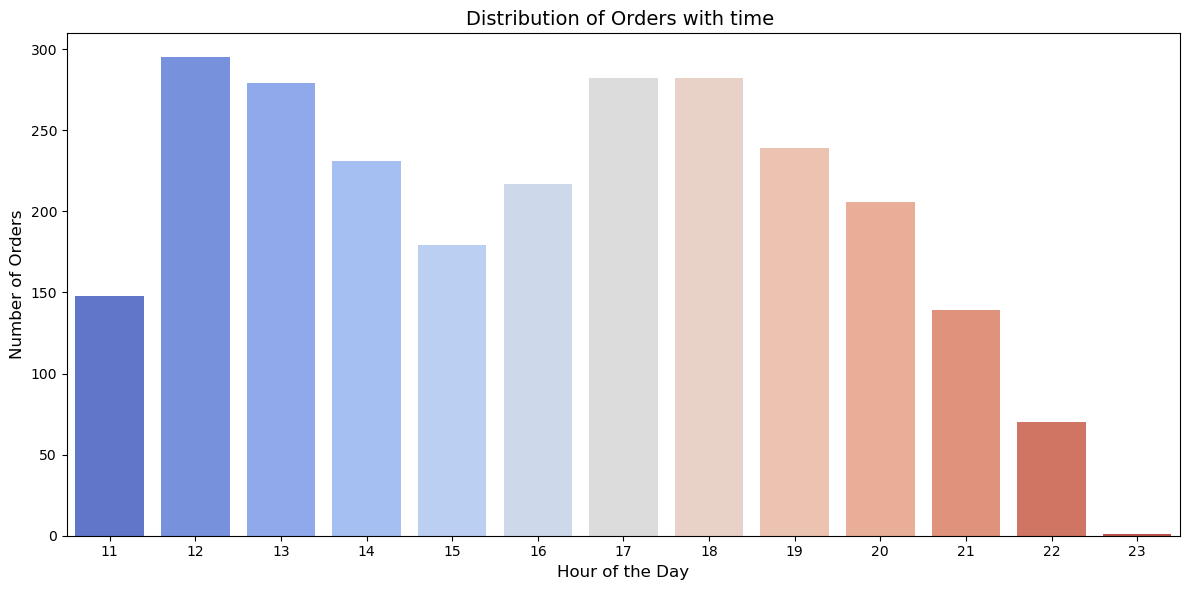

In [34]:
hourly_orders = data.groupby('hour').size()

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_orders.index, y=hourly_orders.values, palette="coolwarm")
plt.title("Distribution of Orders with time ", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()
plt.show()

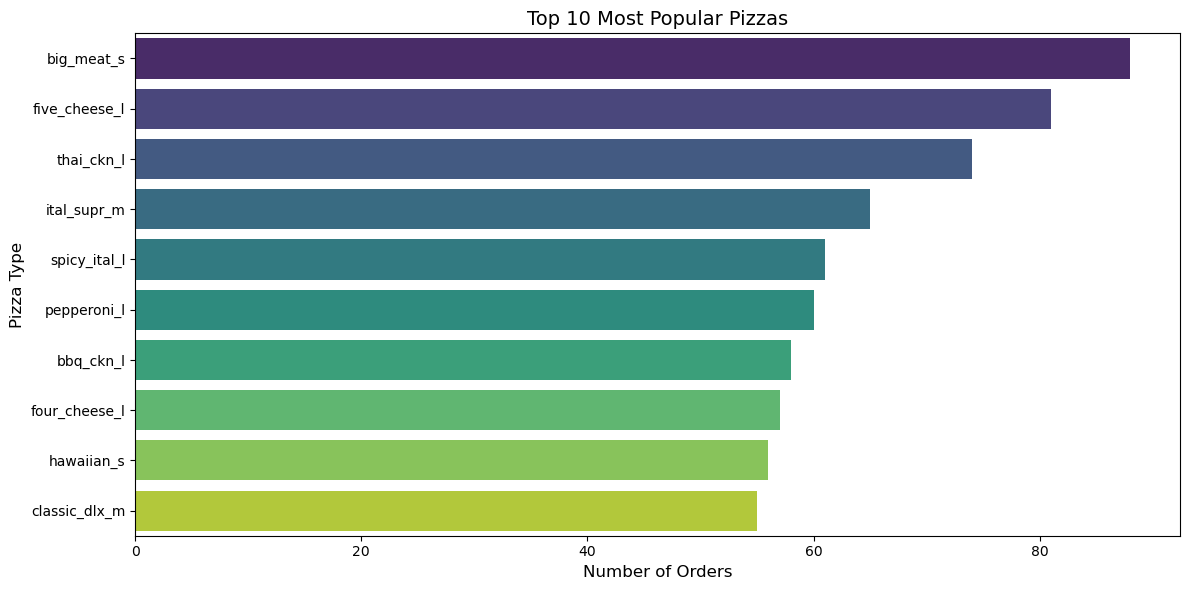

In [35]:
top_pizzas = data['pizza_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_pizzas.values, y=top_pizzas.index, palette="viridis")
plt.title("Top 10 Most Popular Pizzas", fontsize=14)
plt.xlabel("Number of Orders", fontsize=12)
plt.ylabel("Pizza Type", fontsize=12)
plt.tight_layout()
plt.show()

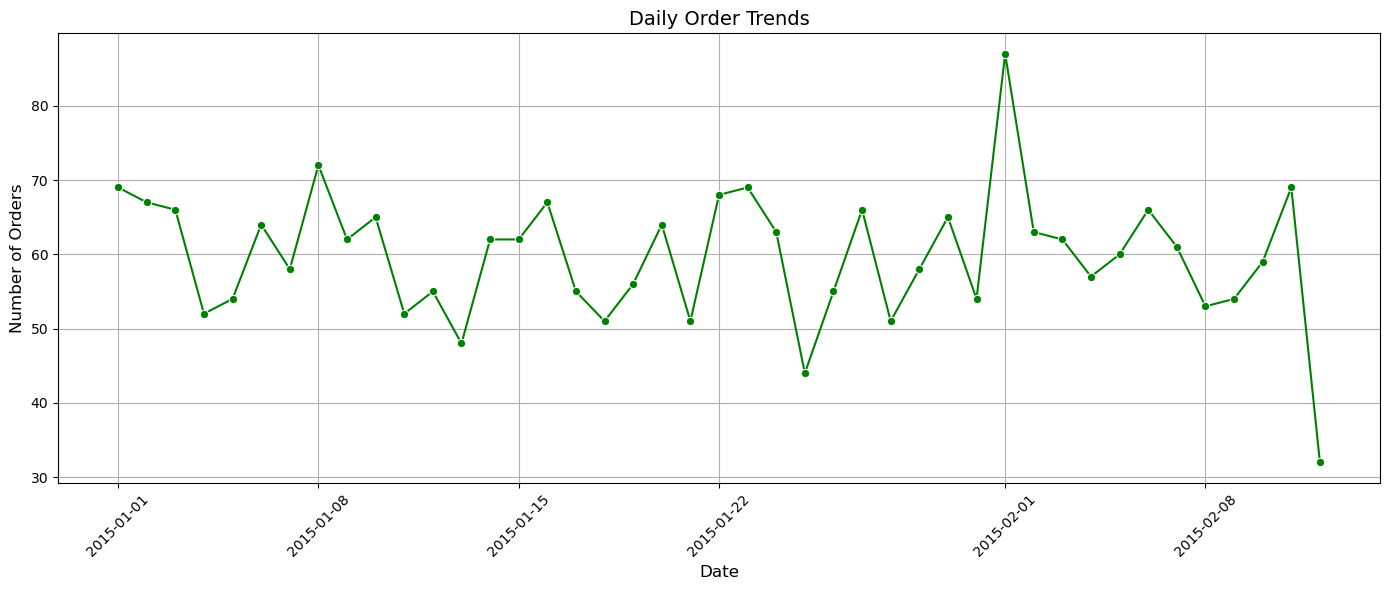

In [36]:
daily_orders = data.groupby('date').size()

plt.figure(figsize=(14, 6))
sns.lineplot(x=daily_orders.index, y=daily_orders.values, marker='o', color='green')
plt.title("Daily Order Trends", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

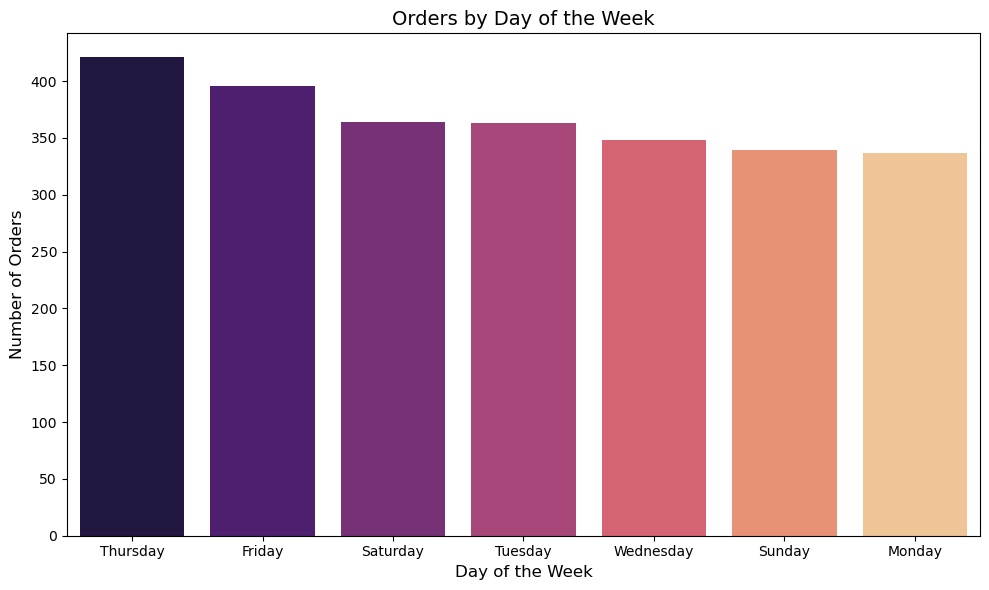

In [37]:
data['day_of_week'] = data['date'].dt.day_name()
orders_by_day = data['day_of_week'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette="magma")
plt.title("Orders by Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.tight_layout()
plt.show()

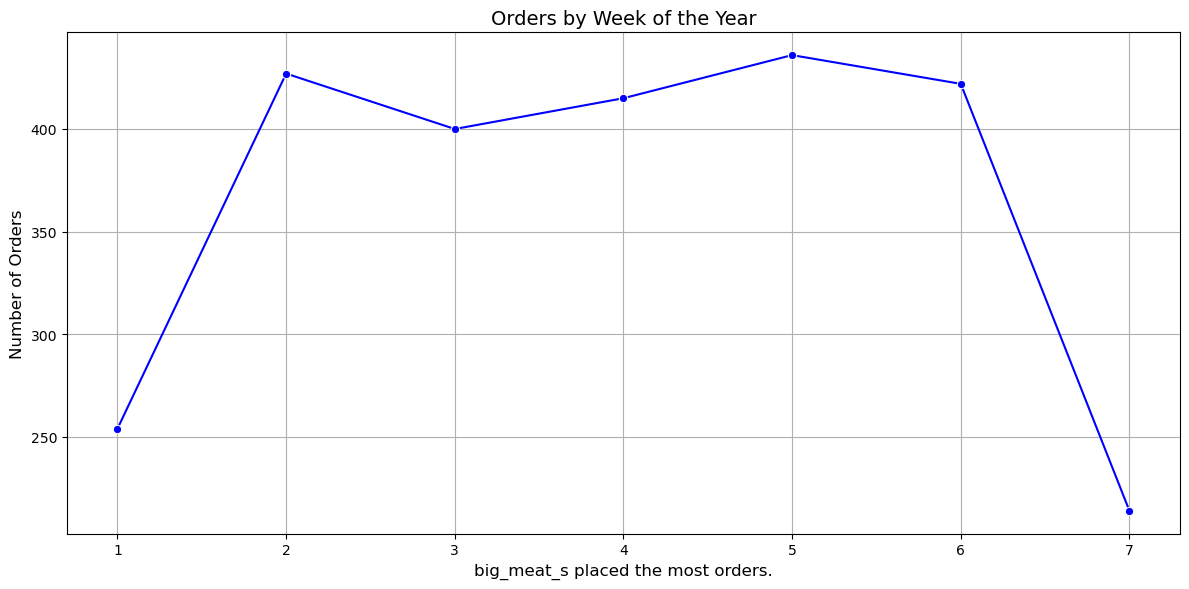

In [38]:
data['week_of_year'] = data['date'].dt.isocalendar().week
weekly_orders = data.groupby('week_of_year').size()

plt.figure(figsize=(12, 6))
sns.lineplot(x=weekly_orders.index, y=weekly_orders.values, marker='o', color='blue')
plt.title("Orders by Week of the Year", fontsize=14)
plt.xlabel("big_meat_s placed the most orders.", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

In [45]:
data = pd.read_csv(r"C:\Users\Vishal\OneDrive\Desktop\Pizza SQL\pizza_sales\pizza_orders.csv")
data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['day_of_week'] = data['datetime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['hour'] = data['datetime'].dt.hour
data = data.drop(['date', 'time', 'datetime', 'pizza_id'], axis=1)
X = data[['order_id', 'day_of_week', 'hour']]
y = data['quantity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
accuracy = 1 - (np.mean(np.abs((y_test - y_pred) / y_test)))
n_trees = len(rf_model.estimators_)
avg_depth = np.mean([tree.get_depth()for tree in rf_model.estimators_])
avg_leaves = np.mean([tree.get_n_leaves()for tree in rf_model.estimators_])

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Number of Node: {n_trees}")
print(f"Average Tree Depth: {avg_depth}")
print(f"Average Number of Leaves: {avg_leaves}")

Mean Squared Error: 0.048411833599914925
Root Mean Squared Error: 0.22002689290156083
R-squared: -0.17255342773772697
Accuracy: 96.19%
Number of Node: 100
Average Tree Depth: 13.08
Average Number of Leaves: 52.58


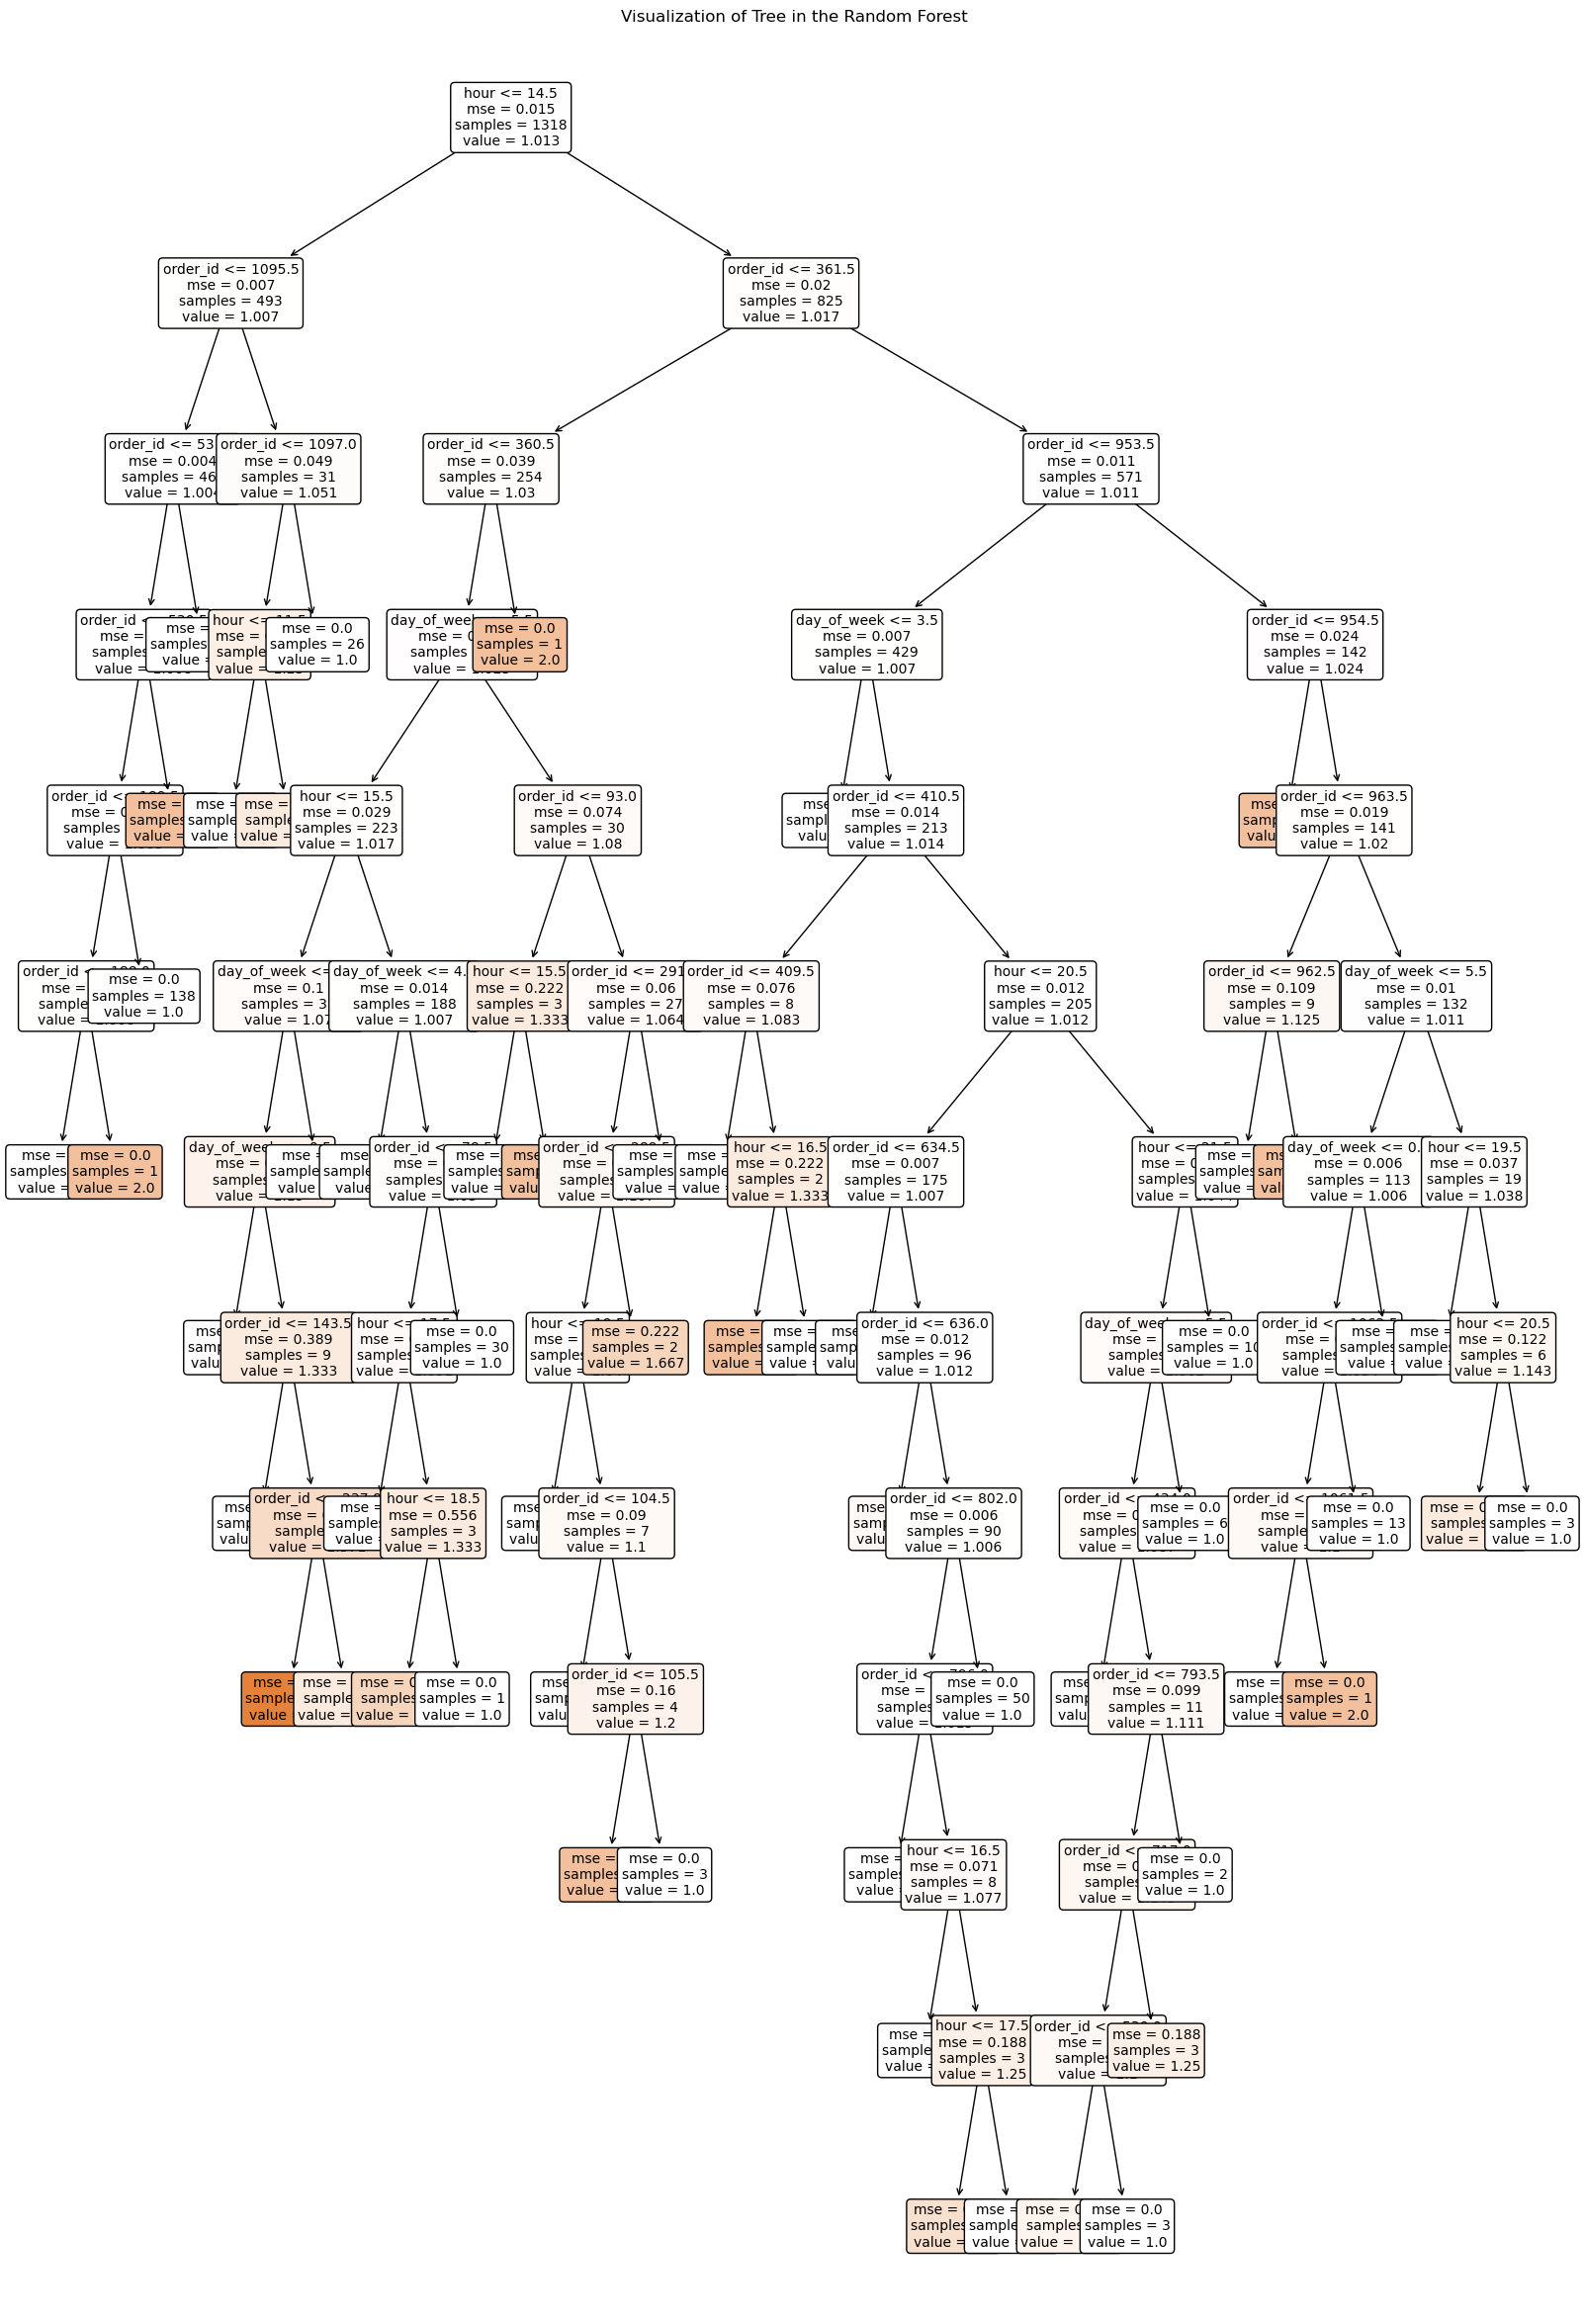

In [44]:
plt.figure(figsize=(20, 30))
plot_tree(rf_model.estimators_[0], feature_names=X.columns, filled=True, rounded= True, fontsize=10)
plt.title('Visualization of Tree in the Random Forest')
plt.show()